**Тут ми створимо анімацію знаходження найкоротшого шляху**

In [2]:
import numpy as np
from scipy.spatial import distance_matrix
import networkx as nx 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import functions as f
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import networkx as nx

*Задання змінних*

In [4]:
num_cities = 20     
num_ants = 50       
evaporation_rate = 0.15 
a = 1               
b = 3                
Q = 1

*Виклик функцій*

In [5]:
 
lenghts, nods, attractiveness, pheromone_matrix, coords = f.create_matrix(num_cities, a, b, Q)

*Реалізація анімації*


Найкращий знайдений шлях: 440.90 (на ітерації 3)
Анімацію збережено як 'solution_fixed.gif'


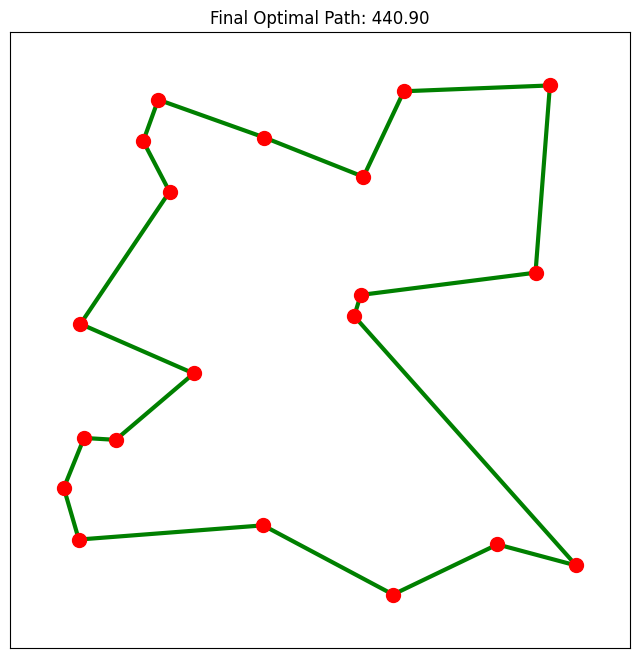

In [ ]:
#тут я переписала функцію, бо вона називалась не правильно
def make_dict_adjacency_matrix(history_best_path):
    dict_adjacency_matrix = {}
    for j in range(len(history_best_path)):
        path_len = len(history_best_path[j])
        adjacency_matrix = np.zeros((path_len, path_len))
        for i in range(path_len):
            v1 = int(history_best_path[j][i])
            v2 = int(history_best_path[j][(i+1) % path_len])
            adjacency_matrix[v1, v2] = adjacency_matrix[v2, v1] = 1
        dict_adjacency_matrix[j] = adjacency_matrix
    return dict_adjacency_matrix

history_best_distence, global_best_distance, history_best_path = f.algorithm(
    lenghts, nods, attractiveness, pheromone_matrix, 
    num_ants, evaporation_rate, a, b, Q
)

#шукаємо мінімум в історії
best_idx = np.argmin(history_best_distence)
best_path_overall = history_best_path[best_idx]
min_val = history_best_distence[best_idx]
print(f"Найкращий знайдений шлях: {min_val:.2f} (на ітерації {best_idx})")

#кадри
dict_adjacency = make_dict_adjacency_matrix(history_best_path)
frames_list = list(dict_adjacency.values())

#фінальний кадр
best_matrix_dict = make_dict_adjacency_matrix([best_path_overall])
best_matrix = best_matrix_dict[0]
frames_list.append(best_matrix) 

# анімація
def animation_fixed(num_cities, coords, frames_list):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_axis_off()
    pos = {i: coords[i] for i in range(num_cities)}
    fps = 10
    pause_frames = fps * 7
    total_frames = len(frames_list) + pause_frames
    
    def update(frame):
        ax.clear()

        idx = frame if frame < len(frames_list) else -1
        matrix = frames_list[idx]
        
        current_G = nx.from_numpy_array(matrix)
        
       
        if idx == -1 or idx == len(frames_list) - 1:
            edge_color = 'green'
            node_color = 'red'
            width = 3.0
            title = f"Final Optimal Path: {min_val:.2f}"
        else:
            edge_color = 'gray'
            node_color = 'blue'
            width = 1.0
            title = f"Iteration {idx} (Dist: {history_best_distence[idx]:.1f})"
            
        nx.draw_networkx_nodes(current_G, pos, ax=ax, node_color=node_color, node_size=100)
        nx.draw_networkx_edges(current_G, pos, edge_color=edge_color, width=width)
        ax.set_title(title)
        
    ani = FuncAnimation(fig, update, frames=int(total_frames), interval=200, repeat=False)
    
    #збередення
    output_filename = 'solution_fixed.gif'
    ani.save(output_filename, writer=PillowWriter(fps=fps))
    print(f"Анімацію збережено як '{output_filename}'")
        
    

animation_fixed(num_cities, coords, frames_list)